<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_groupwise_(y_hat)_0_1_0_9_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n250.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.576637,76.024232,67.066480,88.282887,-0.158879,261.791357,262.934414,-1.143057
1,0.0,1.0,45.152384,88.892153,91.133863,69.290395,0.065212,304.534008,304.490538,0.043469
2,0.0,2.0,31.417271,44.273060,69.867181,95.829555,0.720275,252.107342,252.101620,0.005722
3,0.0,3.0,68.258350,76.459160,40.799554,60.942273,-0.108470,256.350866,256.726288,-0.375421
4,0.0,4.0,68.308275,94.550857,90.148574,37.775008,-0.029944,300.752769,300.102554,0.650215
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.200909,63.936296,56.043692,69.980640,-0.641664,222.519873,223.114952,-0.595079
19996,999.0,16.0,76.580215,55.732009,38.253253,68.498213,0.006189,249.069879,248.744179,0.325700
19997,999.0,17.0,32.433411,64.334236,93.152689,69.568100,0.460708,269.949144,269.389585,0.559559
19998,999.0,18.0,70.288278,56.288806,26.627096,43.231983,-0.997448,205.438715,206.281792,-0.843077


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.576637,76.024232,67.066480,88.282887,-0.158879,261.791357,262.934414,-1.143057
1,0.0,1.0,45.152384,88.892153,91.133863,69.290395,0.065212,304.534008,304.490538,0.043469
2,0.0,2.0,31.417271,44.273060,69.867181,95.829555,0.720275,252.107342,252.101620,0.005722
3,0.0,3.0,68.258350,76.459160,40.799554,60.942273,-0.108470,256.350866,256.726288,-0.375421
4,0.0,4.0,68.308275,94.550857,90.148574,37.775008,-0.029944,300.752769,300.102554,0.650215
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.200909,63.936296,56.043692,69.980640,-0.641664,222.519873,223.114952,-0.595079
19996,999.0,16.0,76.580215,55.732009,38.253253,68.498213,0.006189,249.069879,248.744179,0.325700
19997,999.0,17.0,32.433411,64.334236,93.152689,69.568100,0.460708,269.949144,269.389585,0.559559
19998,999.0,18.0,70.288278,56.288806,26.627096,43.231983,-0.997448,205.438715,206.281792,-0.843077


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.576637  76.024232  67.066480  88.282887 -0.158879  261.791357   
      1.0    45.152384  88.892153  91.133863  69.290395  0.065212  304.534008   
      2.0    31.417271  44.273060  69.867181  95.829555  0.720275  252.107342   
      3.0    68.258350  76.459160  40.799554  60.942273 -0.108470  256.350866   
      4.0    68.308275  94.550857  90.148574  37.775008 -0.029944  300.752769   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.200909  63.936296  56.043692  69.980640 -0.641664  222.519873   
      16.0   76.580215  55.732009  38.253253  68.498213  0.006189  249.069879   
      17.0   32.433411  64.334236  93.152689  69.568100  0.460708  269.949144   
      18.0   70.288278  56.288806  26.627096  43.231983 -0.997448  205.438715   
      19.0   27.627257  24.130116  44.941665  59.194333 -0.650827  165.242544   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.934414 -1.143057  
      1.0    304.490538  0.043469  
      2.0    252.101620  0.005722  
      3.0    256.726288 -0.375421  
      4.0    300.102554  0.650215  
...                 ...       ...  
999.0 15.0   223.114952 -0.595079  
      16.0   248.744179  0.325700  
      17.0   269.389585  0.559559  
      18.0   206.281792 -0.843077  
      19.0   165.799979 -0.557435  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.576637  76.024232  67.066480  88.282887 -0.158879  261.791357   
      1.0    45.152384  88.892153  91.133863  69.290395  0.065212  304.534008   
      2.0    31.417271  44.273060  69.867181  95.829555  0.720275  252.107342   
      3.0    68.258350  76.459160  40.799554  60.942273 -0.108470  256.350866   
      4.0    68.308275  94.550857  90.148574  37.775008 -0.029944  300.752769   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.200909  63.936296  56.043692  69.980640 -0.641664  222.519873   
      16.0   76.580215  55.732009  38.253253  68.498213  0.006189  249.069879   
      17.0   32.433411  64.334236  93.152689  69.568100  0.460708  269.949144   
      18.0   70.288278  56.288806  26.627096  43.231983 -0.997448  205.438715   
      19.0   27.627257  24.130116  44.941665  59.194333 -0.650827  165.242544   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.934414 -1.143057  
      1.0    304.490538  0.043469  
      2.0    252.101620  0.005722  
      3.0    256.726288 -0.375421  
      4.0    300.102554  0.650215  
...                 ...       ...  
999.0 15.0   223.114952 -0.595079  
      16.0   248.744179  0.325700  
      17.0   269.389585  0.559559  
      18.0   206.281792 -0.843077  
      19.0   165.799979 -0.557435  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.576637,76.024232,67.066480,88.282887,-0.158879,261.791357,262.934414,-1.143057
1,0.0,1.0,45.152384,88.892153,91.133863,69.290395,0.065212,304.534008,304.490538,0.043469
2,0.0,2.0,31.417271,44.273060,69.867181,95.829555,0.720275,252.107342,252.101620,0.005722
3,0.0,3.0,68.258350,76.459160,40.799554,60.942273,-0.108470,256.350866,256.726288,-0.375421
4,0.0,4.0,68.308275,94.550857,90.148574,37.775008,-0.029944,300.752769,300.102554,0.650215
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.200909,63.936296,56.043692,69.980640,-0.641664,222.519873,223.114952,-0.595079
19996,999.0,16.0,76.580215,55.732009,38.253253,68.498213,0.006189,249.069879,248.744179,0.325700
19997,999.0,17.0,32.433411,64.334236,93.152689,69.568100,0.460708,269.949144,269.389585,0.559559
19998,999.0,18.0,70.288278,56.288806,26.627096,43.231983,-0.997448,205.438715,206.281792,-0.843077


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    20.576637  76.024232  67.066480  88.282887 -0.158879  261.791357   
      1.0    45.152384  88.892153  91.133863  69.290395  0.065212  304.534008   
      2.0    31.417271  44.273060  69.867181  95.829555  0.720275  252.107342   
      3.0    68.258350  76.459160  40.799554  60.942273 -0.108470  256.350866   
      4.0    68.308275  94.550857  90.148574  37.775008 -0.029944  300.752769   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.200909  63.936296  56.043692  69.980640 -0.641664  222.519873   
      16.0   76.580215  55.732009  38.253253  68.498213  0.006189  249.069879   
      17.0   32.433411  64.334236  93.152689  69.568100  0.460708  269.949144   
      18.0   70.288278  56.288806  26.627096  43.231983 -0.997448  205.438715   
      19.0   27.627257  24.130116  44.941665  59.194333 -0.650827  165.242544   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.934414 -1.143057  
      1.0    304.490538  0.043469  
      2.0    252.101620  0.005722  
      3.0    256.726288 -0.375421  
      4.0    300.102554  0.650215  
...                 ...       ...  
999.0 15.0   223.114952 -0.595079  
      16.0   248.744179  0.325700  
      17.0   269.389585  0.559559  
      18.0   206.281792 -0.843077  
      19.0   165.799979 -0.557435  

[20000 rows x 8 columns]

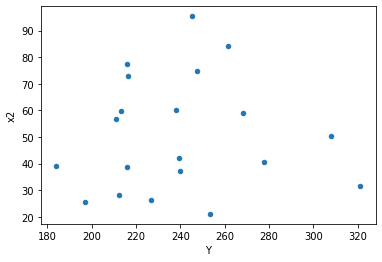

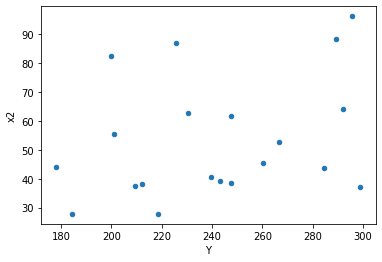

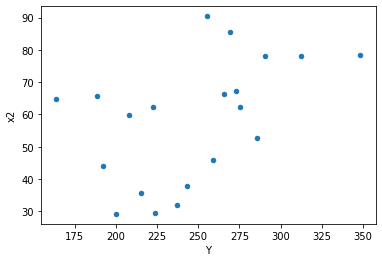

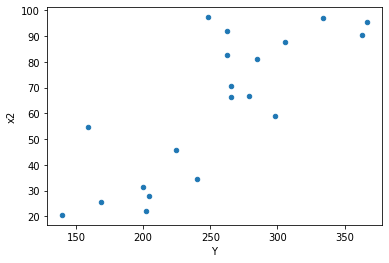

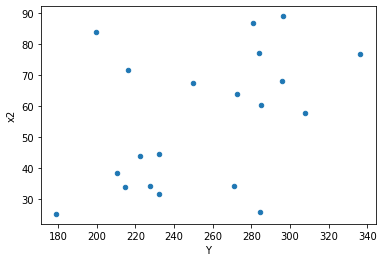

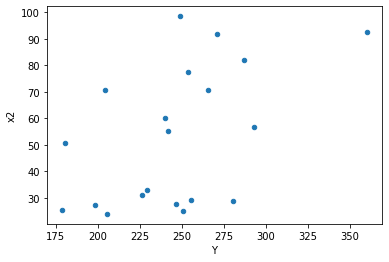

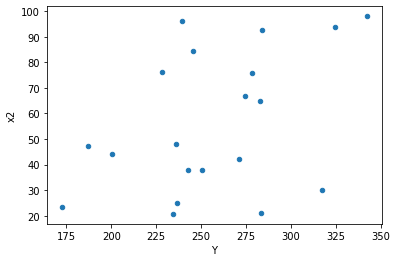

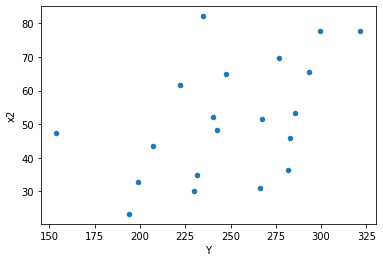

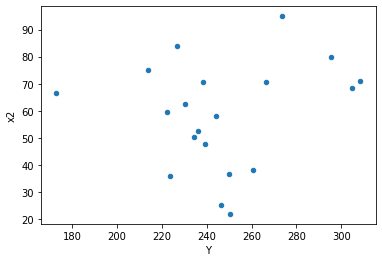

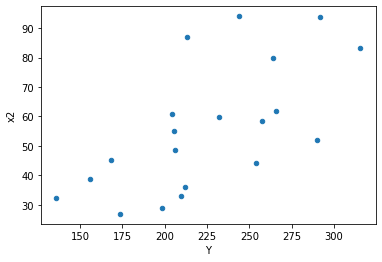

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,4.0,4.0,1.8452517461203541,3.9425334049694127,0.46131293653008854,0.9856333512423532,2.1365829422779834,0.4802453333640173,0.7598773333179913,0.24012266668200866,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,1.228891884085572,1.9854921260460032,0.307222971021393,0.4963730315115008,1.6156768156406398,0.6534511130403169,0.6732744434798416,0.32672555652015844,Reject005=1 : Homoscedasticity
9.0,4.0,4.0,0.1563712001194485,3.840453169987005,0.039092800029862124,0.9601132924967513,24.55984968493794,0.008944514988479924,0.99552774250576,0.004472257494239962,Reject005=0 : Heteroscedasticity
10.0,4.0,4.0,0.6517791264846502,1.0134786374129015,0.16294478162116255,0.25336965935322536,1.5549418449146508,0.6793185546358811,0.6603407226820595,0.33965927731794054,Reject005=1 : Homoscedasticity
13.0,4.0,4.0,0.3084516707700476,1.4447857724554931,0.0771129176925119,0.3611964431138733,4.683993991177272,0.16393166684200144,0.9180341665789993,0.08196583342100072,Reject005=1 : Homoscedasticity
14.0,4.0,4.0,0.23440931811283675,2.2222006288437215,0.058602329528209186,0.5555501572109304,9.480001250522085,0.051154501080056036,0.974422749459972,0.025577250540028018,Reject005=1 : Homoscedasticity
15.0,4.0,4.0,0.33043737604650936,0.6143282132126255,0.08260934401162734,0.15358205330315639,1.8591365800161732,0.5628338214406663,0.7185830892796669,0.28141691072033315,Reject005=1 : Homoscedasticity
17.0,4.0,4.0,1.1019079059727765,1.541971511753432,0.27547697649319414,0.385492877938358,1.399365140585104,0.7526363830814784,0.6236818084592608,0.3763181915407392,Reject005=1 : Homoscedasticity
18.0,4.0,4.0,1.3825994995313728,4.5246616690382435,0.3456498748828432,1.1311654172595609,3.2725758041803585,0.2773937676176781,0.861303116191161,0.13869688380883904,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,2.459216707624941,1.2394952622908093,0.6148041769062352,0.3098738155727023,0.5040203486125009,0.5232769680791987,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,1.8452517461203541,3.9425334049694127,0.46131293653008854,0.9856333512423532,2.1365829422779834,0.4802453333640173,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,0.8696931218470485,0.31175201133822456,0.21742328046176213,0.07793800283455614,0.35846208680612274,0.34428201520774343,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,4.244346725034594,0.5469035886960937,1.0610866812586486,0.13672589717402342,0.12885459745083291,0.07222726930689204,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,1.228891884085572,1.9854921260460032,0.307222971021393,0.4963730315115008,1.6156768156406398,0.6534511130403169,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,0.5004433075350346,0.41701947194136013,0.12511082688375866,0.10425486798534003,0.8333001274318486,0.8639826271772116,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,1.5341000860264618,0.11087300298819609,0.38352502150661544,0.027718250747049023,0.0722723399849178,0.026032664981596468,Reject005=0 : Heteroscedasticity
7.0,4.0,4.0,1.4231503591462875,0.851006532207075,0.3557875897865719,0.21275163305176875,0.5979737325278635,0.6305844974014496,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,1.8749965023910646,1.2374221387691045,0.46874912559776616,0.3093555346922761,0.6599597050933685,0.6970252353886656,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      856
Reject005=0 : Heteroscedasticity    144
Name: Result_test, dtype: int64